In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # TODO: Load the MNIST dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# TODO: Check the shape of the dataset
print("x train shape:", x_train.shape)
print("y train shape:",y_train.shape)
print("x test shape:",x_test.shape)
print("y test shape:",y_test.shape)

x train shape: (60000, 28, 28)
y train shape: (60000,)
x test shape: (10000, 28, 28)
y test shape: (10000,)


In [ ]:
# Convert grayscale to RGB by expanding dimensions
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

In [ ]:
def resize_images(images):
    resized_image = images.shape[0]   # TODO: Resize images to 48x48 as required by VGG19
    new_array = np.zeros((resized_image, 48, 48, 3))
    for i in range(resized_image):
        new_array[i] = tf.image.resize(images[i], (48, 48))
    return new_array

In [ ]:
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

In [ ]:
# TODO: Normalize pixel values to range [0, 1]
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

In [ ]:
# TODO: Convert labels to categorical format (one-hot encoding)
number_of_classes = 10
y_train = to_categorical(y_train,num_classes = number_of_classes)
y_test = to_categorical(y_test,num_classes = number_of_classes)

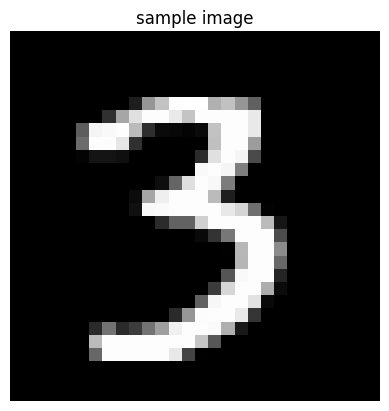

In [ ]:
# TODO: Visualize a sample image
plt.imshow(x_train[10000])
plt.axis("off")
plt.title("sample image")
plt.show()

In [ ]:
# TODO: Load the VGG19 model without the top layer, using pretrained ImageNet weights
vgg19_base = VGG19(include_top=False, weights="imagenet", input_shape=(48, 48, 3))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# TODO: Build a Sequential model using VGG19 as the base
model = Sequential([vgg19_base])

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# TODO: Train the model
epochs = 20
batch_size = 500

history = model.fit(
    x_train_resized,
    y_train,
    validation_data=(x_test_resized, y_test),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 56s 467ms/step - accuracy: 0.1124 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 478ms/step - accuracy: 0.1112 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 474ms/step - accuracy: 0.1139 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 477ms/step - accuracy: 0.1132 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 474ms/step - accuracy: 0.1111 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 497ms/step - accuracy: 0.1132 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.1114 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.1139 - loss: 2

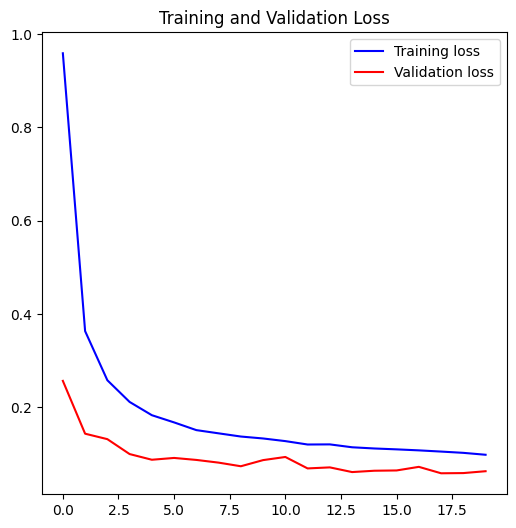

In [ ]:
# TODO: Plot training and validation loss
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()


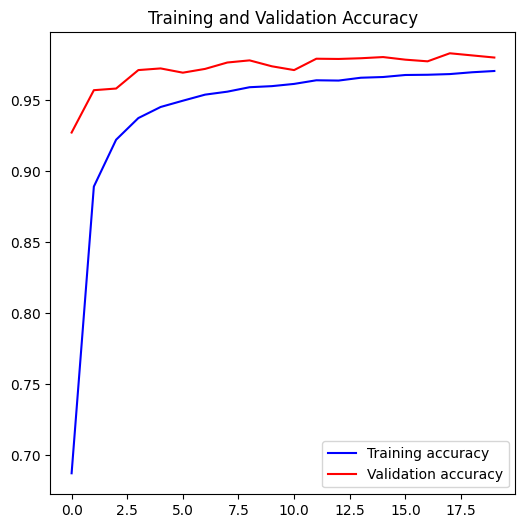

In [ ]:
# TODO: Plot training and validation accuracy
plt.figure(figsize=(6,6))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
y_pred = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [ ]:
# TODO: Compute and display the confusion matrix
y_predict=model.predict(x_test_resized)
y_predict_classes=np.argmax(y_predict,axis=1)
y_true=np.argmax(y_test,axis=1)
confusion_mtx=confusion_matrix(y_true,y_predict_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Blues",linecolor="white",fmt=".1f",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()